In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/Portfolio Projects/WhatsApp Chat Analysis/data/whatsapp_chat/Whatsapp_chat.csv")
df.head()

,Unnamed: 0,hours,days,months,names,timestamp
0,0,1,19,May,Person4,2020-05-19
1,1,22,19,May,Person3,2020-05-19
2,2,22,19,May,Person3,2020-05-19
3,3,22,19,May,Person1,2020-05-19
4,4,22,19,May,Person3,2020-05-19


In [3]:
df.drop(columns=("Unnamed: 0"),inplace=True)

In [4]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [5]:
df.isnull().sum()

hours        0
days         0
months       0
names        0
timestamp    0
dtype: int64

In [6]:
df['names'] = df['names'].astype('category')

In [7]:
df.drop_duplicates()

,hours,days,months,names,timestamp
0,1,19,May,Person4,2020-05-19
1,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
7,23,19,May,Person1,2020-05-19
9,3,20,May,Person2,2020-05-20
...,...,...,...,...,...
51458,19,12,August,Person1,2020-08-12
51459,19,12,August,Person4,2020-08-12
51484,19,12,August,Person2,2020-08-12
51572,20,12,August,Person3,2020-08-12


In [8]:
df[df.duplicated(keep=False)].head()

,hours,days,months,names,timestamp
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19
5,22,19,May,Person1,2020-05-19


In [9]:
# Check for duplicates based on certain columns (e.g., 'names' and 'timestamp')
df[df.duplicated(subset=['names', 'timestamp'], keep=False)].head()

,hours,days,months,names,timestamp
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19
5,22,19,May,Person1,2020-05-19


In [10]:
total_rows=df.shape[0]
unique_users=df['names'].unique()

In [11]:
# Percentage of duplicates
duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / total_rows) * 100

In [12]:
df=df.rename(columns={"timestamp":"datetime"})
df.to_csv("Cleaned_data.csv")

In [13]:
#Messages breakdown
messages_per_user=df['names'].value_counts().to_frame().reset_index()
messages_per_user.columns=['names','count']

In [14]:
# Display statistics
print(f"Total rows: {total_rows}")
print(f"Unique users: {unique_users}")
print(f"Duplicate rows: {duplicates} ({duplicate_percentage:.2f}%)")
print("Top message contributors:")
print(messages_per_user.head(10))

Total rows: 51575
Unique users: ['Person4', 'Person3', 'Person1', 'Person2']
Categories (4, object): ['Person1', 'Person2', 'Person3', 'Person4']
Duplicate rows: 48787 (94.59%)
Top message contributors:
     names  count
0  Person1  17543
1  Person4  16683
2  Person3  13514
3  Person2   3835


In [15]:
# Create a DataFrame for descriptive stats
descriptive_stats = pd.DataFrame({
    'Metric': ['Total Rows', 'Unique Users', 'Duplicate Rows', 'Duplicate Percentage'],
    'Value': [total_rows, unique_users, duplicates, f"{(duplicates / total_rows) * 100:.2f}%"]
})

# Save to CSV
descriptive_stats.to_csv('descriptive_stats_dataset2.csv', index=False)

print("Descriptive statistics saved to 'descriptive_stats_dataset2.csv'")

Descriptive statistics saved to 'descriptive_stats_dataset2.csv'


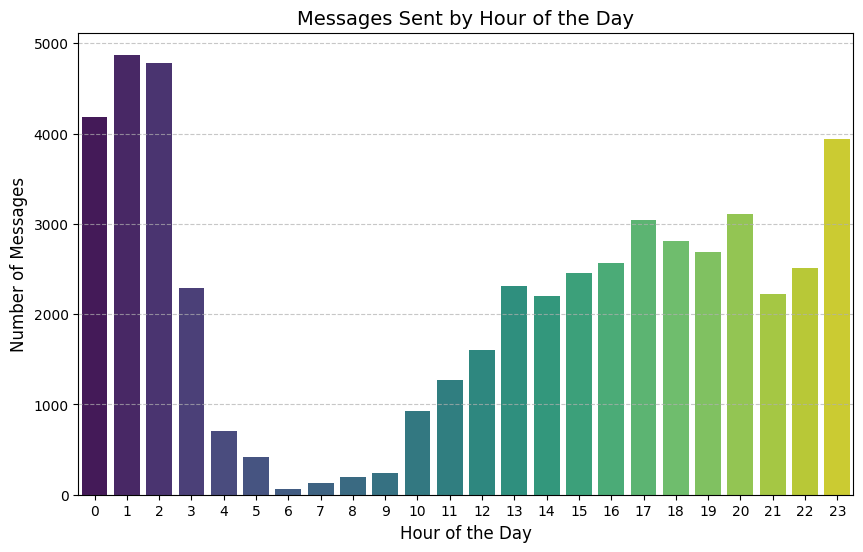

In [16]:
hourly_activity_df=df.groupby("hours").size()

# Plot hourly activity
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_activity_df.index, y=hourly_activity_df.values, palette='viridis')
plt.title("Messages Sent by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Extract day name
df['day_of_week']=df['datetime'].dt.day_name()

In [18]:
#Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

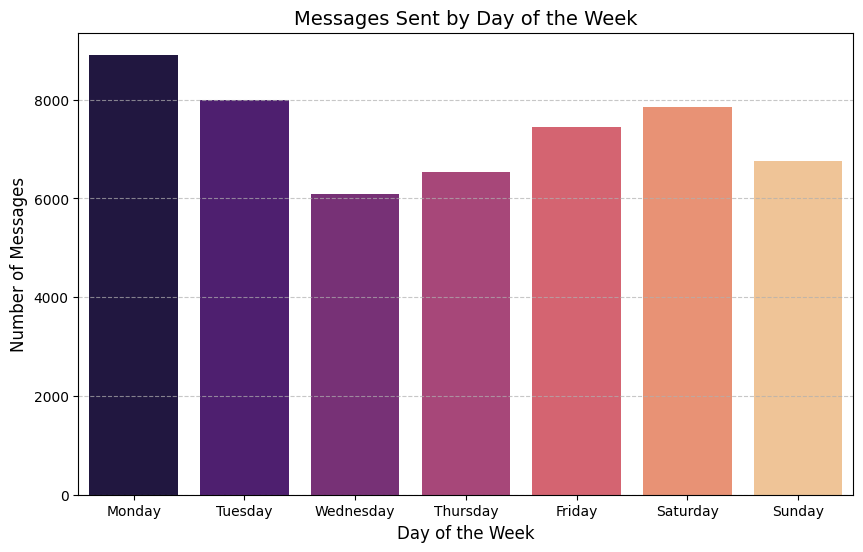

In [19]:
daily_activity=df['day_of_week'].value_counts().reindex(days_order)

# Plot daily activity
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_activity.index, y=daily_activity.values, palette='magma')
plt.title("Messages Sent by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

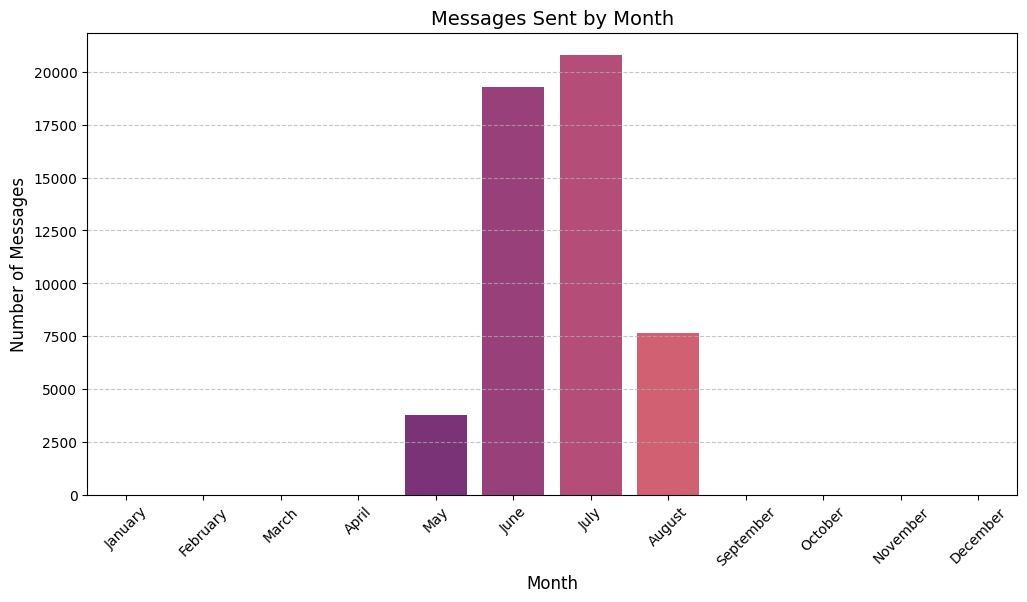

In [20]:
# Extract month name
df['month_name']=df['datetime'].dt.month_name()

#Define the order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_activity=df['month_name'].value_counts().reindex(months_order)

# Plot monthly activity
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_activity.index, y=monthly_activity.values, palette='magma')
plt.title("Messages Sent by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

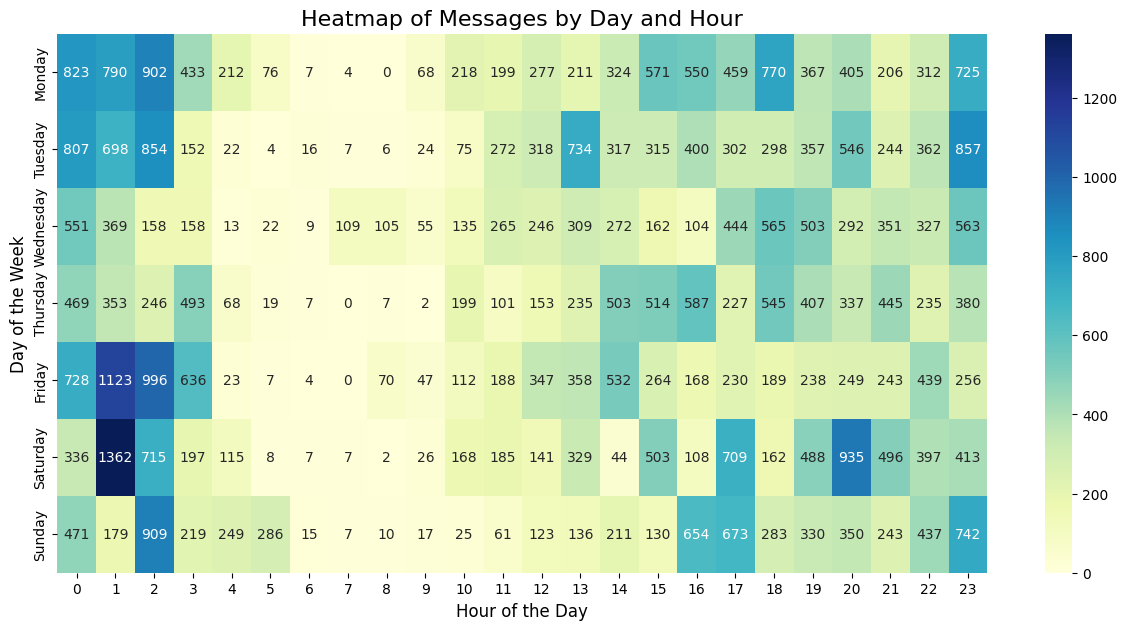

In [21]:
# Create a pivot table for heatmap
heatmap_df=df.pivot_table(index='day_of_week',columns='hours',values='datetime',aggfunc='count',fill_value=0)

# Reorder Days
heatmap_df=heatmap_df.reindex(days_order)

#Plot Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(heatmap_df,cmap='YlGnBu',annot=True,fmt='d')
plt.title("Heatmap of Messages by Day and Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()

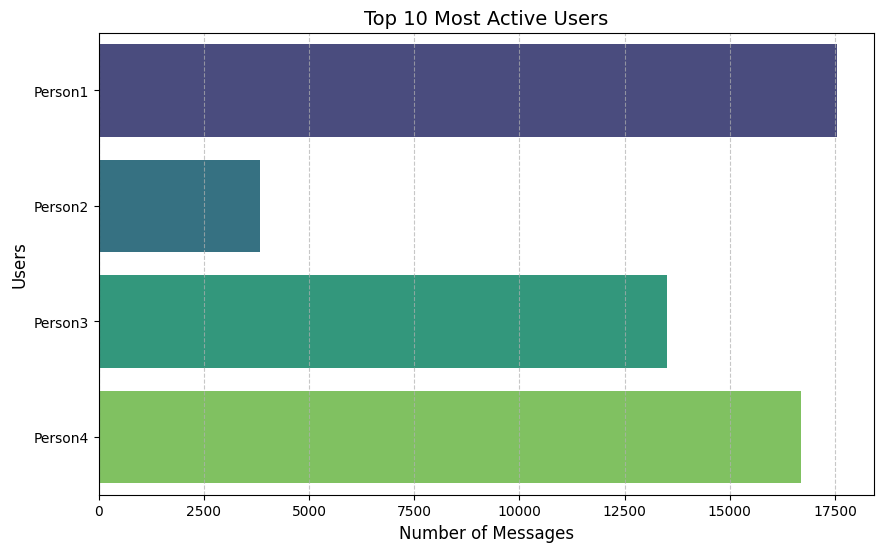

In [22]:
# Top 10 users by message count
top_10_users = df['names'].value_counts().head(10)

# Convert to DataFrame for plotting
top_10_users = top_10_users.reset_index()
top_10_users.columns = ['User', 'Message Count']

# Plot top 10 users
plt.figure(figsize=(10, 6))
sns.barplot(x='Message Count', y='User', data=top_10_users, palette='viridis')
plt.title("Top 10 Most Active Users", fontsize=14)
plt.xlabel("Number of Messages", fontsize=12)
plt.ylabel("Users", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


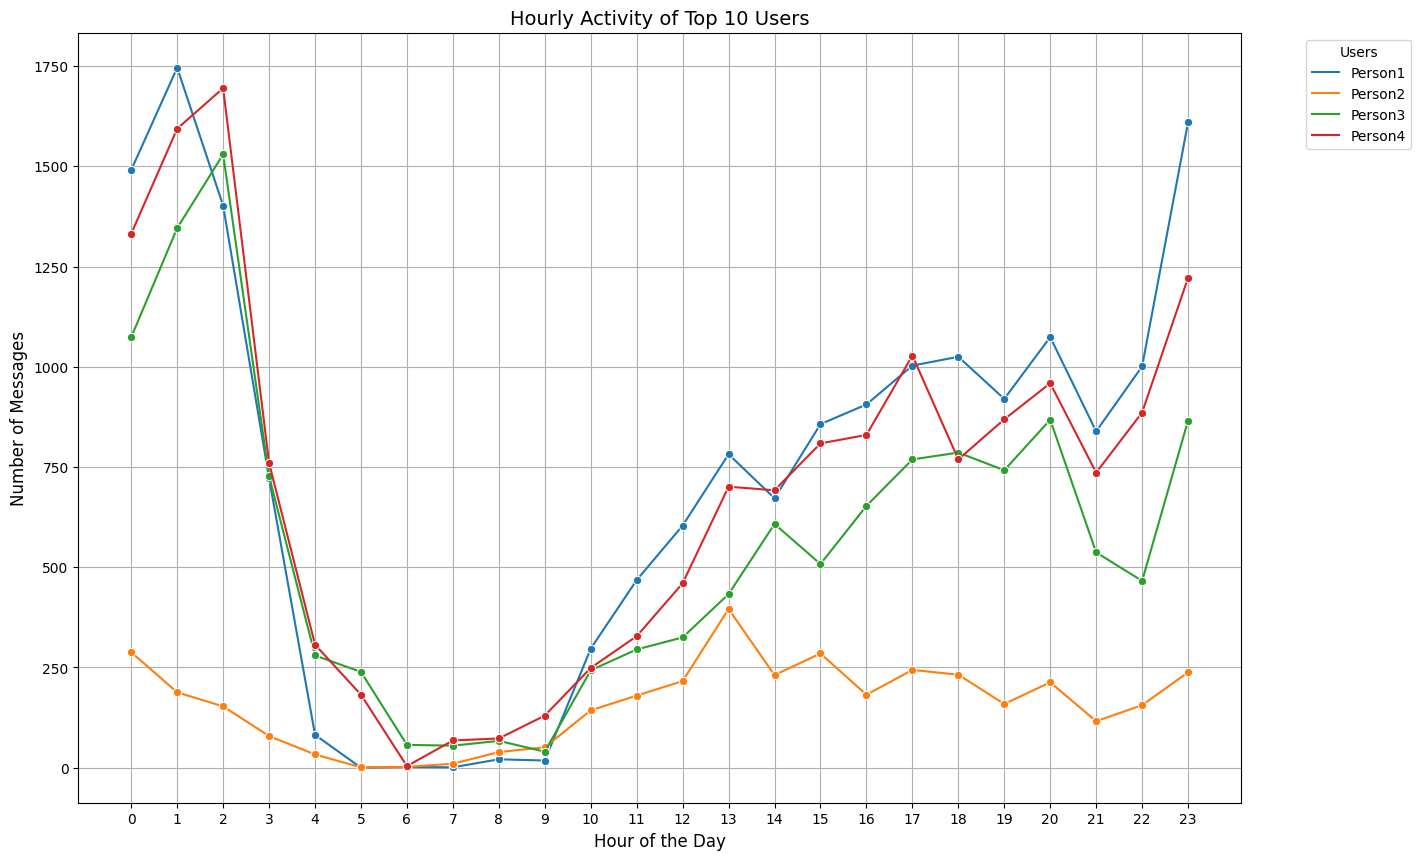

In [23]:
# Filter data for 10 users
top_users_list=top_10_users['User'].tolist()
top_user_activity=df[df['names'].isin(top_users_list)]

# Group by User and hour
user_hour_activity = top_user_activity.groupby(['names',"hours"]).size().reset_index(name='message_count')

# Plot hourly activity for each top user
plt.figure(figsize=(15, 10))
sns.lineplot(data=user_hour_activity, x='hours', y='message_count', hue='names', marker='o')
plt.title("Hourly Activity of Top 10 Users", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

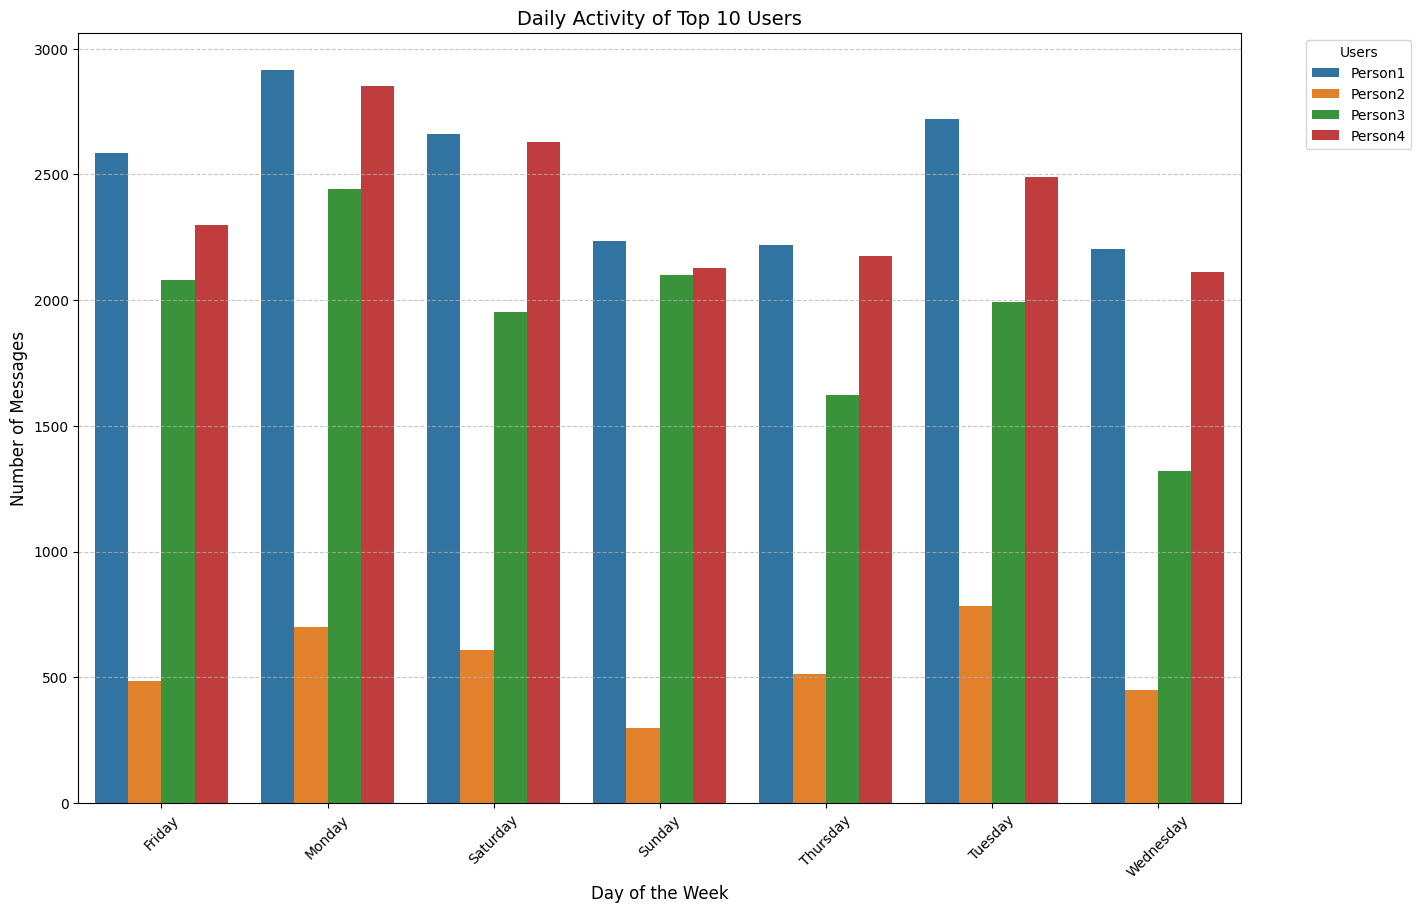

In [24]:
# Group by user and day of the week
user_day_activity=top_user_activity.groupby(['names','day_of_week']).size().reset_index(name='message_count')

# Plot daily activity for each top user
plt.figure(figsize=(15, 10))
sns.barplot(data=user_day_activity, x='day_of_week', y='message_count', hue='names', palette='tab10')
plt.title("Daily Activity of Top 10 Users", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()